### Importing libraries and load the dataset
We start by importing the neccessary libraries and laoding the dataset.

In [1]:
# pandas is used for data manipulation
import pandas as pd 
# matplotlib and  seaborn are used for data visalizations
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset - the dataset is loaded into a DataFrame for easy handling
file_path = '/kaggle/input/noshowappointments/KaggleV2-May-2016.csv'
data = pd.read_csv(file_path)

#Display the first few rows to understand the structure
print(data.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

### Data Overview
Inspect the dataset for missing values and general statistics.

In [2]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics - describe() provides numerical summaries e.g., mean, nedian, etc
print(data.describe())

# Check column names and data types - info() reveals column data types and memory usage
print(data.info())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110

#### Observations
* There are no missing values in any of the columns. This means we don't need to handle missing data, simplifing preprocessing.
* 1. `Age`:
     * Negative age (-1) indicates an error. We will need to clean this data.
     * Age distribution seems plausible for general hospital visits.
  2. `Scholarships`, `Hipertension`, `Diabetes`, `Alcholism`:
     * Binary columns (0 or 1)
  3. `Handcap`:
     * Majority are 0 (not handicapped). However, values > 1 need review (unusual encoding).
* Column Types:
  * `ScheduledDay` and `AppointmentDay` are `objects` (strings). These need to be converted to `datetime` for propper analysis.
  * `No-show` is an object, representing categorical data ("Yes" or "No"). We should map ot to binary values (e.g., 1 for "No-show" and 0 for "Showed up").
 

#### Next Steps
1. Clean Data:
   * Remove rows with invalid ages (`Age < 0`).
   * Investigate and address the unusual `Handcap` values (>1).
3. Transform Data:
   * Conver `ScheduledDay` and `AppointmentDay` to `datetime`.
   * Encode `No-show` as binary (e.g., 1 for "Yes", 0 for "No").
5. Insights:
   * Study attendence behavior based on gender, age groups, neighborhood, and other health indicators (e.g., hypertension, diabetes).
   * Analyze impact of SMS reminders on no-show rates.

### Data Cleaning
Correcting data formatting and clean the dataset.

In [3]:
# Remove rows with invalid age values - filters out rows where Age is less than 0 (invalid).
data = data[data['Age'] >= 0]

# Investigate Handcap column - display frequency of each value in Handcap column. Unusual values (>1) need review; they may represent an encoding issue.
print(data['Handcap'].value_counts())

# Investigate Gender column - Check unique values in Gender
print(data['Gender'].unique())

# Confirm the current unique values in 'No-show'
print(data['No-show'].unique())

# Convert date columns to datetime - Converts from object (string) to datetime.
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# Encode No-show as binary - makes columns suitable for numerical analysis
data['No-show'] = data['No-show'].map({"No":0, "Yes":1})
# Verify the No-show returns [0, 1]
print(data['No-show'].unique())

# Verify transforamtions
print(data.head())
print(data.info())

Handcap
0    108285
1      2042
2       183
3        13
4         3
Name: count, dtype: int64
['F' 'M']
['No' 'Yes']
[0 1]
      PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-

#### Observations:
* The `Handcap` column values greater than 1 may indicate unusual encoding due to errors.
* The time component (`00:00:00+00:00`) in `ScheduledDay` and `AppointmentDay` is redundant since it's not relevant to the analysis.
* Columns like `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, `Handcap`, `SMS_received`, and `No-show` are binary (0 or 1).
* The `Gender` column is currently an `object` datatype but only contains two categories: `'M'` and `'F'`. Convert it to `category` datatype for efficiency.
* `PatientId` and `AppointmentID` are identifiers and do not contribute directly to our analysis. Removing them will simplify the dataset.

In [4]:
# Re-encode Handap column: all values > 0 set to 1
data['Handcap'] = data['Handcap'].apply(lambda x: 1 if x>0 else 0)

# Extract only the date part for ScheduleDay and AppointmentDay
data['ScheduledDay'] = data['ScheduledDay'].dt.date
data['AppointmentDay'] = data['AppointmentDay'].dt.date

# Convert binary columns to boolean
binary_cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
data[binary_cols] = data[binary_cols].astype(bool)

# Convert Gender to category
data['Gender'] =data['Gender'].astype('category')

# Drop PatientId and AppointmentID
data = data.drop(columns=['PatientId', 'AppointmentID'])

# Verify changes
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Gender          110526 non-null  category
 1   ScheduledDay    110526 non-null  object  
 2   AppointmentDay  110526 non-null  object  
 3   Age             110526 non-null  int64   
 4   Neighbourhood   110526 non-null  object  
 5   Scholarship     110526 non-null  bool    
 6   Hipertension    110526 non-null  bool    
 7   Diabetes        110526 non-null  bool    
 8   Alcoholism      110526 non-null  bool    
 9   Handcap         110526 non-null  bool    
 10  SMS_received    110526 non-null  bool    
 11  No-show         110526 non-null  bool    
dtypes: bool(7), category(1), int64(1), object(3)
memory usage: 5.1+ MB
None
  Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA        False   
1    

In [5]:
# Create a column for the waiting time (days between schduling and appointment)
# data['WaitingTime'] = data['AppointmentDay'] - data['ScheduledDay']
# Confirm the current unique values in 'No-show'
#print(data['No-show'].unique())  # Should return [True, False] or [1, 0]

### Overall Attendance

No-show
False    88207
True     22319
Name: count, dtype: int64


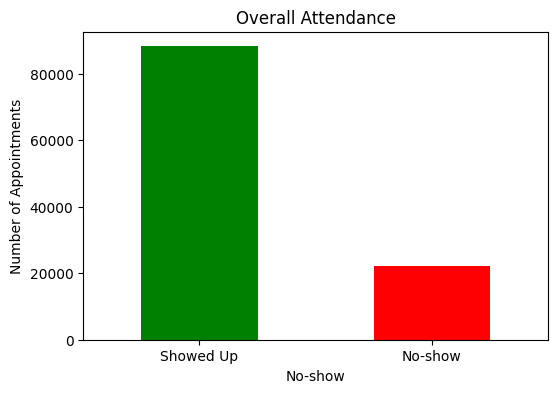

In [6]:
# Attendance counts
attendance_counts = data['No-show'].value_counts()
print(attendance_counts)

# Plot the attendance distribution
plt.figure(figsize=(6,4))
attendance_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Overall Attendance")
plt.xticks(ticks=[0,1], labels=['Showed Up', 'No-show'], rotation=0)
plt.ylabel('Number of Appointments')
plt.show()

#### Highlight the percentage of no-shows

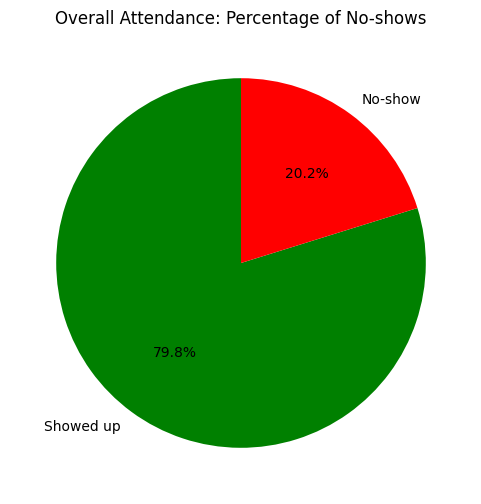

In [7]:
# Calculate percentages
attendance_counts = data['No-show'].value_counts(normalize=True) * 100

# Plot the attendance distribution
plt.figure(figsize=(6, 6))
attendance_counts.plot(kind='pie', labels=['Showed up', 'No-show'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Overall Attendance: Percentage of No-shows')
plt.ylabel('')
plt.show()

### Influence of SMS Reminders

sms_effect:
 No-show       False  True 
SMS_received              
False         62509  12535
True          25698   9784


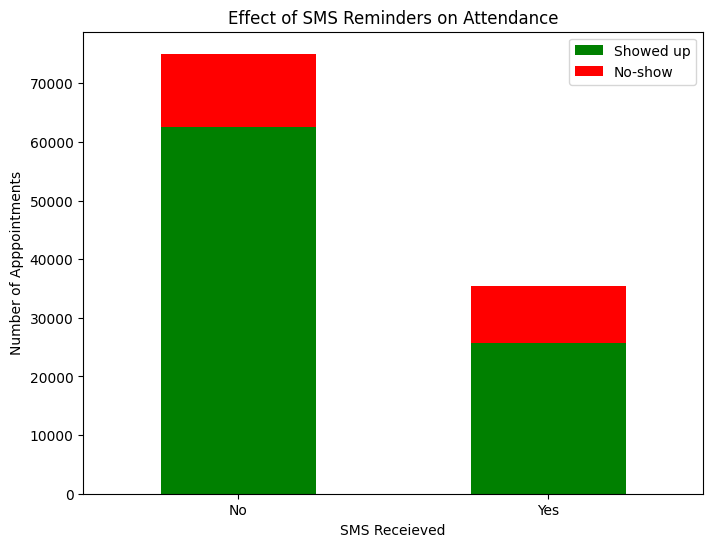

In [8]:
# Attendance by SMS reminder
sms_effect = data.groupby(['SMS_received', 'No-show']).size().unstack()
print("sms_effect:\n", sms_effect)

# Plot SMS impact
sms_effect.plot(kind='bar', stacked=True, figsize=(8,6), color=['green', 'red'])
plt.title('Effect of SMS Reminders on Attendance')
plt.xlabel('SMS Receieved')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
plt.ylabel("Number of Apppointments")
plt.legend(['Showed up', 'No-show'])
plt.show()

#### Age and Attendance

Age Group:
 0           60+
1         35-59
2           60+
3          0-17
4         35-59
          ...  
110522    35-59
110523    35-59
110524    18-34
110525    35-59
110526    35-59
Name: AgeGroup, Length: 110526, dtype: category
Categories (4, object): ['0-17' < '18-34' < '35-59' < '60+']
Age effect:
 No-show   False  True 
AgeGroup              
0-17      19619   5708
18-34     18384   5753
35-59     30548   7213
60+       16752   3003


/tmp/ipykernel_16/105600188.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_effect = data.groupby(['AgeGroup', 'No-show']).size().unstack()


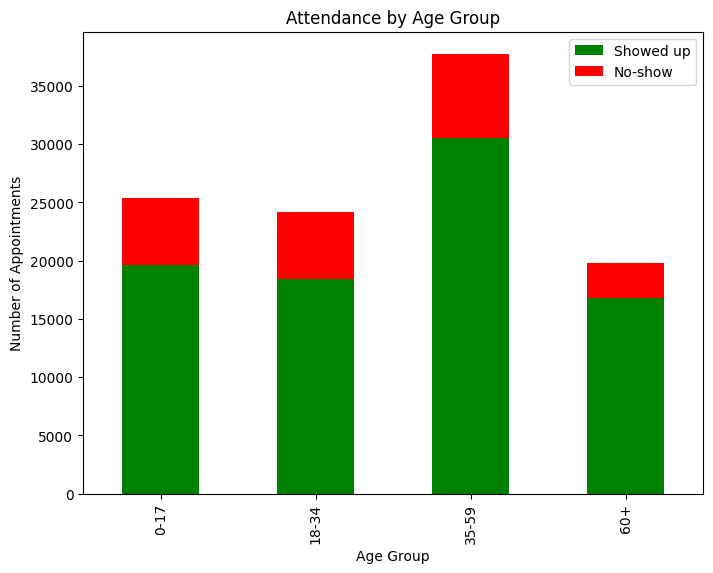

In [9]:
# Attendance by age group
age_bins = [0, 18, 35, 60, 100]
age_labels = ['0-17', '18-34', '35-59', '60+']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
print('Age Group:\n', data['AgeGroup'])

age_effect = data.groupby(['AgeGroup', 'No-show']).size().unstack()
print('Age effect:\n', age_effect)

# Plot attendance by age group
age_effect.plot(kind='bar', stacked=True, figsize=(8,6), color=['green', 'red'])
plt.title('Attendance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Appointments')
plt.legend(['Showed up', 'No-show'])
plt.show()

### Neighborhood Analysis

Neighborhood effect:
 Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
JESUS DE NAZARETH              0.243954
HORTO                          0.240000
ILHA DO PRÍNCIPE               0.234775
CARATOÍRA                      0.230409
ANDORINHAS                     0.230327
Name: No-show, dtype: float64


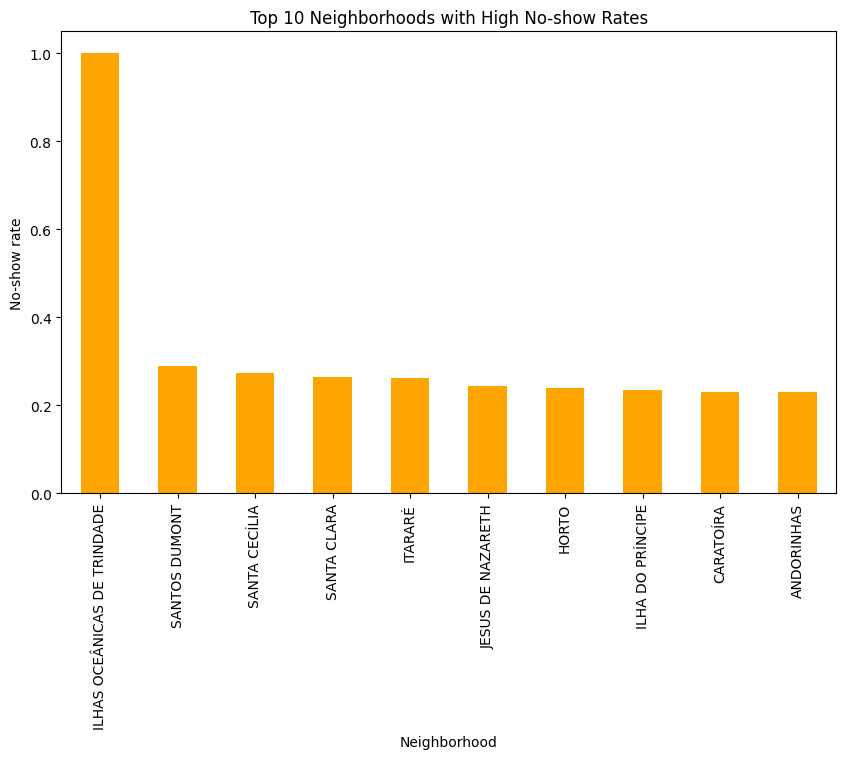

In [10]:
# Top neighborhoods by no-show rate
neighborhood_effect = data.groupby('Neighbourhood')['No-show'].mean().sort_values(ascending=False).head(10)
print('Neighborhood effect:\n', neighborhood_effect)

# Plot the top neighborhoods with high no-show rates
neighborhood_effect.plot(kind='bar', figsize=(10,6), color='orange')
plt.title('Top 10 Neighborhoods with High No-show Rates')
plt.xlabel('Neighborhood')
plt.ylabel('No-show rate')
plt.xticks(rotation=90)
plt.show()

### Waiting Time and Attendance

In [11]:
# Create the 'WaitingTime' column
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['WaitingTime'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

data['WaitingTime'].info()
data['WaitingTime'].describe()

<class 'pandas.core.series.Series'>
Index: 110526 entries, 0 to 110526
Series name: WaitingTime
Non-Null Count   Dtype
--------------   -----
110526 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingTime, dtype: float64

#### Observations:s:
1. **Negative Waiting Times**:
   - The `min` value of `WaitingTime` is `-6`. This is unusual because the scheduled day (`ScheduledDay`) should logically always precede or coincide with the appointment day (`AppointmentDay`). Negative values indicate potential data entry errors or incorrect logic.

2. **Positive and Zero Waiting Times**:
   - Positive waiting times are expected and indicate the number of days between scheduling and the appointment.
   - Zero waiting times suggest that the appointment was scheduled and occurred on the same day.

### Actions:
1. **Handle Negative Waiting Times**:
   - Investigate rows where `WaitingTime` is negative. This could be a data quality issue or misinterpretation of the dates.

2. **Filter Out or Adjust Invalid Entries**:
   - Decide whether to filter out rows with negative waiting times or set them to `0` (assuming they represent same-day scheduling and appointment).

3. **Confirm Waiting Time Distribution**:
   - Visualize the waiting time distribution to understandy and provides a clear picture for further analysis.

In [12]:
# Investigate rows with negative waiting times
print(data[data['WaitingTime'] < 0])

# Replace negative waiting times with 0 (optional, if we interpret them as same-day scheduling)
data['WaitingTime'] = data['WaitingTime'].apply(lambda x: max(x, 0))

# Verify the changes
print(data['WaitingTime'].describe())

      Gender ScheduledDay AppointmentDay  Age  Neighbourhood  Scholarship  \
27033      M   2016-05-10     2016-05-09   38    RESISTÊNCIA        False   
55226      F   2016-05-18     2016-05-17   19  SANTO ANTÔNIO        False   
64175      F   2016-05-05     2016-05-04   22     CONSOLAÇÃO        False   
71533      F   2016-05-11     2016-05-05   81  SANTO ANTÔNIO        False   
72362      M   2016-05-04     2016-05-03    7     TABUAZEIRO        False   

       Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show  \
27033         False     False       False     True         False     True   
55226         False     False       False     True         False     True   
64175         False     False       False    False         False     True   
71533         False     False       False    False         False     True   
72362         False     False       False    False         False     True   

      AgeGroup  WaitingTime  
27033    35-59           -1  
55226    18-34

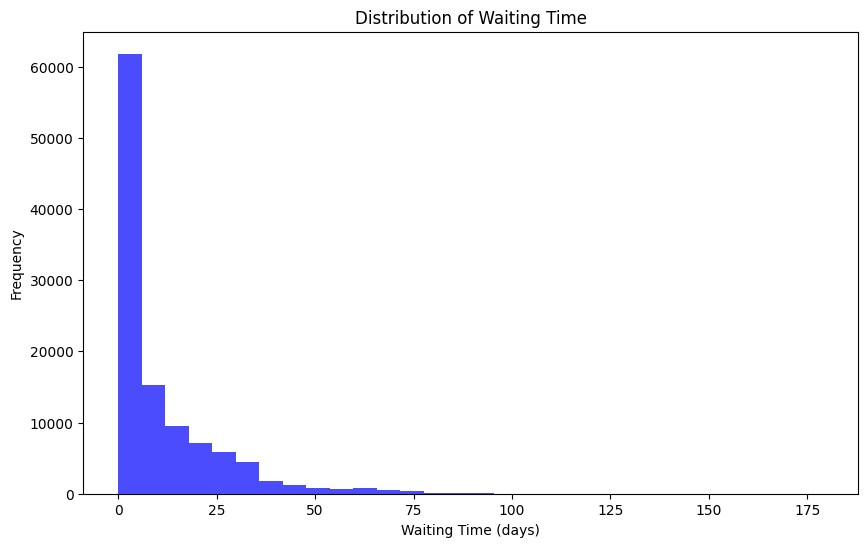

In [13]:
# Visualize the waiting time distribution
plt.figure(figsize=(10, 6))
data['WaitingTime'].plot(kind='hist', bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Waiting Time')
plt.xlabel('Waiting Time (days)')
plt.ylabel('Frequency')
plt.show()

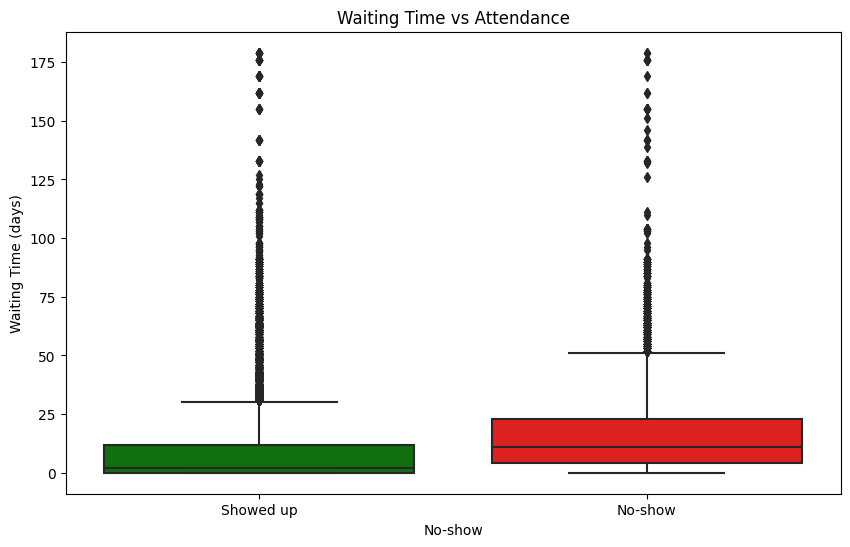

In [14]:
# Waiting time and attendance
plt.figure(figsize=(10, 6))
sns.boxplot(x='No-show', y='WaitingTime', data=data, palette=['green', 'red'])
plt.title('Waiting Time vs Attendance')
plt.xticks(ticks=[0, 1], labels=['Showed up', 'No-show'])
plt.ylabel('Waiting Time (days)')
plt.show()